
# Case Study: Investigate-FBI-Gun-Data

<a id='intro'></a>
## Introduction

This analysis explores the relationship between gun registration and census data across the United States, focusing on the years 2010 and 2016. By comparing gun registration rates per capita with census data, this study aims to identify trends in gun ownership across different states and years

Here is the summarised information of the dataset:

- Handgun - A firearm with a short stock designed to be held and fired with one hand.
- Long Gun - A shoulder-fired weapon, like rifles or shotguns, that uses cartridges or shotgun shells for single-trigger pulls.
- Other - Firearms that are not handguns or long guns, such as pistol-grip shotguns, frames, receivers, or silencers.
- Pre-Pawn - Background checks for individuals pledging or pawning a firearm as loan collateral.
- Redemption - Background checks for individuals reclaiming a firearm from a pawn shop.
- Returned/Disposition - Background checks by law enforcement before returning a firearm to its owner.
- Rentals - Background checks for individuals renting or borrowing a firearm for off-premises use.
- Private Sale  - Background checks for individuals purchasing a firearm from a private seller.
- Return to Seller Private Sale - Background checks for individuals returning a firearm to a private seller.

The complete guide is uploaded [here](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view).

## Asking Questions
Based on an initial study of the dataset, we have come up with several questions that we would like the answer to and, which our analysis would be based on.

The questions are

- What census data is most associated with high gun per capita?
- Which states have had the highest growth in gun registrations?
- What is the overall trend of gun purchases?

## Assessing Data
We import the required libraries and load the census and gun dataset.

Numpy - Data arrays
Pandas - Data manipulation
Matplotlib & Seaborn - Data visualisation

In [4]:
#importing Libraries
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import numpy as np

In [5]:
#Load Data
df_census = pd.read_csv('/Users/noahscomputer/Documents/Programming /Python/Project/FBI/US_Census_Data.csv')
df_gun = pd.read_csv('/Users/noahscomputer/Documents/Programming /Python/Project/FBI/gun_data.csv')

Let's have a look at the data sets using df.head().

In [7]:
# preview census dataset
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [8]:
# preview gun dataset
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


Let’s spend some time assessing our dataset. Begin by finding out how many rows it contains

In [10]:
# this returns a tuple of the dimensions of the dataframe
df_census.shape,df_gun.shape

((85, 52), (12485, 27))

In [11]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column & datatypes 
df_census.info(),df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

(None, None)

After running info(), some columns have missing values. To investigate further we will run df.isnull().sum() to identify which columns contain these missing values and how many are present

In [13]:
# Check for missing values in each column
df_census.isnull().sum(),df_gun.isnull().sum()

(Fact               5
 Fact Note         57
 Alabama           20
 Alaska            20
 Arizona           20
 Arkansas          20
 California        20
 Colorado          20
 Connecticut       20
 Delaware          20
 Florida           20
 Georgia           20
 Hawaii            20
 Idaho             20
 Illinois          20
 Indiana           20
 Iowa              20
 Kansas            20
 Kentucky          20
 Louisiana         20
 Maine             20
 Maryland          20
 Massachusetts     20
 Michigan          20
 Minnesota         20
 Mississippi       20
 Missouri          20
 Montana           20
 Nebraska          20
 Nevada            20
 New Hampshire     20
 New Jersey        20
 New Mexico        20
 New York          20
 North Carolina    20
 North Dakota      20
 Ohio              20
 Oklahoma          20
 Oregon            20
 Pennsylvania      20
 Rhode Island      20
 South Carolina    20
 South Dakota      20
 Tennessee         20
 Texas             20
 Utah     

After running `isnull().sum()`, many features have missing values that we need to fix before performing any analysis. Before that, let's find out how many unique values are in each column.

In [15]:
# this returns the number of unique values in each column
df_census.nunique(), df_gun.nunique()

(Fact              80
 Fact Note         15
 Alabama           65
 Alaska            64
 Arizona           64
 Arkansas          64
 California        63
 Colorado          64
 Connecticut       63
 Delaware          64
 Florida           64
 Georgia           64
 Hawaii            63
 Idaho             63
 Illinois          65
 Indiana           63
 Iowa              65
 Kansas            65
 Kentucky          65
 Louisiana         65
 Maine             64
 Maryland          64
 Massachusetts     65
 Michigan          64
 Minnesota         65
 Mississippi       65
 Missouri          64
 Montana           65
 Nebraska          65
 Nevada            63
 New Hampshire     65
 New Jersey        65
 New Mexico        64
 New York          65
 North Carolina    65
 North Dakota      63
 Ohio              64
 Oklahoma          64
 Oregon            63
 Pennsylvania      65
 Rhode Island      64
 South Carolina    65
 South Dakota      65
 Tennessee         64
 Texas             64
 Utah     


`df.nunique()` gave us some pretty interesting insights. There's 55 unique states types - we'll run `.unique()` to see what they are!



In [17]:
df_gun['state'].unique(), 

(array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
        'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
        'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
        'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
        'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
        'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
        'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
        'Wisconsin', 'Wyoming'], dtype=object),)

Interesting! So far, we’ve learned a lot from the data. But hey, why does it show 55 states when there should only be 50? Something’s definitely off with the data. We’ll dive deeper into it later.

For now, though, it looks like `'Guam,' 'Puerto Rico,' 'District of Columbia,' 'Virgin Islands,' and 'Mariana Islands' `are included in these values, which might explain the discrepancy

## Cleaning Column

Before doing anything to these two datasets, we need to normalize the columns. We'll drop features that are either inconsistent (not present in both datasets) or irrelevant to our analysis.

We use the pandas `df.drop()` function.
### Filter the values in the `state` column to include only the names of the 50 U.S. states. Exclude all other entries

In [ ]:
# Remove name of the colonies : Guam, Puerto Rico, District Columbia, Virgin Islands, and Mariana Islands 
df_gun= df_gun[df_gun.state != 'Guam']
df_gun= df_gun[df_gun.state != 'Puerto Rico']
df_gun= df_gun[df_gun.state != 'District of Columbia']
df_gun= df_gun[df_gun.state != 'Virgin Islands']
df_gun= df_gun[df_gun.state != 'Mariana Islands']
df_gun= df_gun[df_gun.state != 'Guam']

### Drop Extraneous Columns

In [20]:
# drop columns from df_census dataset: 'Fact', 'Fact Note'
df_census.drop(['Fact Note'], axis = 1, inplace = True)
df_census.head(1)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


### Transpose 

We need to transpose ` df_census.`  because right now, what should be columns are rows (or vice versa). By flipping them, the data will be in the right format for analysis or easier to work with.

In [22]:
df_census.set_index('Fact',inplace=True)
df_census = df_census.T.reset_index()
df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# drop columns starting from the 6th index onward dataset, df_census
df_census.drop(df_census.columns[3], axis=1, inplace=True)
df_census.drop(df_census.columns[4:], axis=1, inplace=True)
# confirm changes
df_census.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, Census, April 1, 2010"
0,Alabama,"4,863,300","4,780,131","4,779,736"
1,Alaska,"741,894","710,249","710,231"
2,Arizona,"6,931,071","6,392,301","6,392,017"
3,Arkansas,"2,988,248","2,916,025","2,915,918"
4,California,"39,250,017","37,254,522","37,253,956"


In [24]:
# drop columns starting from the 6th index onward
df_gun.drop(df_gun.columns[8:], axis=1, inplace=True)
# confirm changes
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0


### Rename Columns

We noticed that some column names are inconsistent. To fix this, we'll use the DataFrame's `.rename()` method to standardize them. Specifically:

- Change the "index" column in the census dataset to "State" for consistency.

In [26]:
# rename index to State
df_census.rename(columns={'index':'state'}, inplace=True)
# Rename columns by index
df_census.rename(columns={df_census.columns[1]: 'Population_estimates_July1_2016'}, inplace=True)
df_census.rename(columns={df_census.columns[2]: 'Population_estimates_base_April1_2010'}, inplace=True)
df_census.rename(columns={df_census.columns[3]: 'Population_census_April1_2010'}, inplace=True)


# confirm changes
df_census.head(1)

Fact,state,Population_estimates_July1_2016,Population_estimates_base_April1_2010,Population_census_April1_2010
0,Alabama,"4,863,300","4,780,131","4,779,736"


### Drop Nulls and Dedupe

1. Drop Nulls
Drop any rows in both datasets that contain missing values.

2. Dedupe
Drop any duplicate rows in both datasets.

#### 1. Drop Rows with Missing Values

As a reminder, you can use the `.isnull()` method to view how many null values are in each column.
To count every null from every column, sum the values returned from `.isnull()` by using `.sum()` to return a total count.

In [29]:
# view missing value count for each feature in census
df_census.isnull().sum()

Fact
state                                    0
Population_estimates_July1_2016          0
Population_estimates_base_April1_2010    0
Population_census_April1_2010            0
dtype: int64

In [30]:
# view missing value count for each feature in gun
df_gun.isnull().sum()

month                 0
state                 0
permit               24
permit_recheck    11385
handgun              20
long_gun             19
other              6985
multiple              0
dtype: int64

In [31]:
# The code replaces missing values in specified columns of df_gun with the mean value of each column, ensuring no data is lost and maintaining data integrity

features = ['permit', 'permit_recheck', 'handgun', 'long_gun']

for c in features:
    df_gun[c] = df_gun[c].fillna(df_gun[c].mean())

In [32]:
missing_other = df_gun[df_gun['other'].isnull()]
print(missing_other)

         month          state   permit  permit_recheck  handgun  long_gun  \
5500   2009-05        Alabama      0.0     1165.956364   8829.0    7878.0   
5501   2009-05         Alaska      0.0     1165.956364   1941.0    2470.0   
5502   2009-05        Arizona   4031.0     1165.956364   7009.0    5248.0   
5503   2009-05       Arkansas   3257.0     1165.956364   4031.0    3860.0   
5504   2009-05     California  22686.0     1165.956364  21720.0   19881.0   
...        ...            ...      ...             ...      ...       ...   
12480  1998-11       Virginia      0.0     1165.956364     14.0       2.0   
12481  1998-11     Washington      1.0     1165.956364     65.0     286.0   
12482  1998-11  West Virginia      3.0     1165.956364    149.0     251.0   
12483  1998-11      Wisconsin      0.0     1165.956364     25.0     214.0   
12484  1998-11        Wyoming      8.0     1165.956364     45.0      49.0   

       other  multiple  
5500     NaN       559  
5501     NaN       161  


In [33]:
df_gun['other'].fillna(0, inplace=True)


/var/folders/zr/y9b0jtb16_q8qrlcsyx9s7740000gn/T/ipykernel_20490/2995674857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gun['other'].fillna(0, inplace=True)


In [34]:
# checks if any of columns in df_gun have null values - should print False
df_gun.isnull().sum().any()

False

In [35]:
# checks if any of columns in df_gun have null values - should print False
df_census.isnull().sum().any()

False

`False` means that there are no null values

### 2. Dedupe Data

Check if there are duplicate values in your DataFrames by using the `.duplicated()` function. Read more on the functionality [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html).

In [38]:
# print number of duplicates in df_gun and df_census datasets
df_gun.duplicated().sum(), df_census.duplicated().sum()

(0, 0)

### Fix Datatypes

Lets run `.info()` to inspect the data types

In [40]:
df_gun.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317


In [41]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           12485 non-null  object 
 1   state           12485 non-null  object 
 2   permit          12485 non-null  float64
 3   permit_recheck  12485 non-null  float64
 4   handgun         12485 non-null  float64
 5   long_gun        12485 non-null  float64
 6   other           12485 non-null  float64
 7   multiple        12485 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 780.4+ KB


In [42]:
df_census.head(2)

Fact,state,Population_estimates_July1_2016,Population_estimates_base_April1_2010,Population_census_April1_2010
0,Alabama,"4,863,300","4,780,131","4,779,736"
1,Alaska,"741,894","710,249","710,231"


In [43]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   state                                  50 non-null     object
 1   Population_estimates_July1_2016        50 non-null     object
 2   Population_estimates_base_April1_2010  50 non-null     object
 3   Population_census_April1_2010          50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


There are some inconsistencies with the data type of some coloums we will need to fix them.

#### 1. Fixing month 

- df_gun: convert from object to date

In [45]:
df_gun['month'] = pd.to_datetime(df_gun['month'], format='%Y-%m')

#### 2. Fixe Population_estimates_July1_2016, Population_estimates_base_April1_2010, and Population_census_April1_2010 Data Type

> - df_census: convert object to int

In [47]:
df_census['Population_estimates_July1_2016'].value_counts(), 

(Population_estimates_July1_2016
 4,863,300     1
 12784227      1
 2,940,058     1
 1,334,795     1
 8,944,469     1
 2081015       1
 19745289      1
 10146788      1
 757952        1
 11614373      1
 3923561       1
 4093465       1
 1056426       1
 741,894       1
 4961119       1
 865454        1
 6651194       1
 27,862,596    1
 3,051,217     1
 624,594       1
 8,411,808     1
 7,288,000     1
 1,831,102     1
 5,778,708     1
 1,907,116     1
 1,042,520     1
 6,093,000     1
 2,988,726     1
 6,931,071     1
 2,988,248     1
 39,250,017    1
 5,540,545     1
 3,576,452     1
 952,065       1
 20,612,439    1
 10,310,371    1
 1,428,557     1
 1,683,140     1
 12,801,539    1
 6,633,053     1
 3,134,693     1
 2,907,289     1
 4,436,974     1
 4,681,666     1
 1,331,479     1
 6,016,447     1
 6,811,779     1
 9,928,300     1
 5,519,952     1
 585,501       1
 Name: count, dtype: int64,)

From the output, there are different type of unique values i.e. values with coman (1,428,557), and values without coman (3923561). We will try to use the same function astype() to convert from string to int.

In [49]:
features = ['Population_estimates_July1_2016', 
            'Population_estimates_base_April1_2010', 
            'Population_census_April1_2010']

for c in features:  
    df_census[c] = df_census[c].astype(int)

ValueError: invalid literal for int() with base 10: '4,863,300'

#### Figuring out the issue

Looks like this isn't going to be as simple as converting the datatype. According to the error,

> *ValueError:* invalid literal for `int()` with base 10: `'4,863,300'`

The error happens because Python can't convert '4,863,300' to a number due to the commas. Python's int() only works with plain numbers like '4863300'. To fix this, you need to remove the commas first.


In [68]:
## Chckening if column Population_estimates_July1_2016 contains comans 
hb_census= df_census[df_census['Population_estimates_July1_2016'].str.contains(',')]
hb_census.head()


Fact,state,Population_estimates_July1_2016,Population_estimates_base_April1_2010,Population_census_April1_2010
0,Alabama,"4,863,300","4,780,131","4,779,736"
1,Alaska,"741,894","710,249","710,231"
2,Arizona,"6,931,071","6,392,301","6,392,017"
3,Arkansas,"2,988,248","2,916,025","2,915,918"
4,California,"39,250,017","37,254,522","37,253,956"


***
#### It's not just the `Population_estimates_July1_2016`!

The `Population_estimates_base_April1_2010` columns and `Population_census_April1_2010` also seem to have the same problem - maybe that's why these were all saved as strings!

We are going to remove the commans from the values

In [71]:
features = ['Population_estimates_July1_2016', 
            'Population_estimates_base_April1_2010', 
            'Population_census_April1_2010']
for c in features:
    df_census[c] = df_census[c].str.replace(',', '').fillna(0).astype(int)


### All the dataypes are now fixed! Take one last check to confirm all the changes.

In [74]:
# let's check data types again
df_gun.dtypes, df_census.dtypes

(month             datetime64[ns]
 state                     object
 permit                   float64
 permit_recheck           float64
 handgun                  float64
 long_gun                 float64
 other                    float64
 multiple                   int64
 dtype: object,
 Fact
 state                                    object
 Population_estimates_July1_2016           int64
 Population_estimates_base_April1_2010     int64
 Population_census_April1_2010             int64
 dtype: object)

In [76]:
df_gun.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317


In [78]:
df_census.head(1)

Fact,state,Population_estimates_July1_2016,Population_estimates_base_April1_2010,Population_census_April1_2010
0,Alabama,4863300,4780131,4779736


## Save the clean dataset

In [ ]:
df_gun.to_csv("cleaned_data_gun.csv", index=False)

In [ ]:
df_census.to_csv("cleaned_data_census.csv", index=False)


# Data Analysis

In [125]:
import seaborn as sns
#importing Libraries
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import numpy as np


In [113]:
df1 = pd.read_csv("cleaned_data_gun.csv")
df2 = pd.read_csv("cleaned_data_census.csv")


In [115]:
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,year,total_guns_sold
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,2017,12592.0
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,2017,5629.0
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,2017,20560.0
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,2017,10941.0
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,2017,64730.0


In [117]:
df2.head()

,state,Population_estimates_July1_2016,Population_estimates_base_April1_2010,Population_census_April1_2010
0,Alabama,4863300,4780131,4779736
1,Alaska,741894,710249,710231
2,Arizona,6931071,6392301,6392017
3,Arkansas,2988248,2916025,2915918
4,California,39250017,37254522,37253956


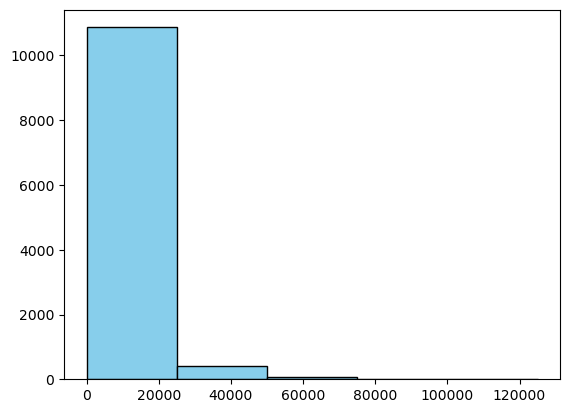

In [119]:
bins = np.arange(0, df1['handgun'].max() + 25000,  25000)
plt.hist(data=df1, x='handgun', bins=bins, color='skyblue', edgecolor='black');

(0.6, 107224.0)

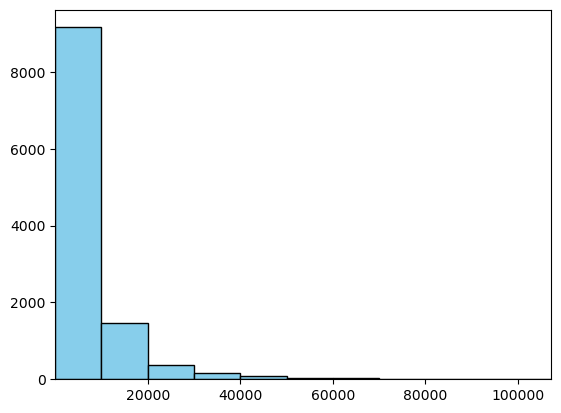

In [121]:
bins = np.arange(0, df1['handgun'].max() + 10000,  10000)
plt.hist(data=df1, x='handgun', bins=bins, color='skyblue', edgecolor='black');
plt.xlim(0.6, df1['handgun'].max()  )

Text(0.5, 0, 'The x-axis limits NOT are changed.\n They are only scaled to log-type')

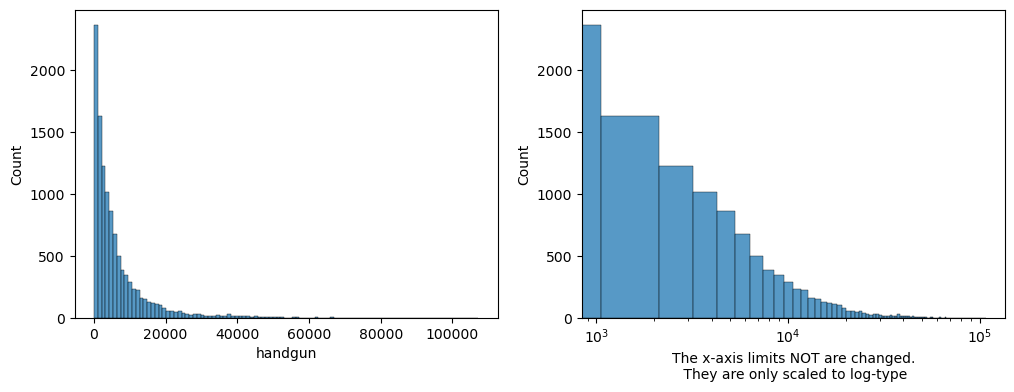

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
## ON LEFT: FULL DATA NO SCALING
sns.histplot(data=df1, x= 'handgun', bins=101, ax=ax1)

## ON RIGHT: FULL DATA WITH LOG SCALING
sns.histplot(data=df1, x= 'handgun', bins=101, ax=ax2)
ax2.set_xscale('log')
ax2.set_xlabel('The x-axis limits NOT are changed.\n They are only scaled to log-type')

In [135]:
df1['handgun'].describe()

count     11350.000000
mean       6509.303877
std        8829.284061
min           0.000000
25%        1327.250000
50%        3622.500000
75%        7987.750000
max      107224.000000
Name: handgun, dtype: float64

In [137]:
np.log10(df1['handgun'].describe(),)

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    4.054996
mean     3.813535
std      3.945925
min          -inf
25%      3.122953
50%      3.559008
75%      3.902424
max      5.030292
Name: handgun, dtype: float64

In [139]:
bins = 10 ** np.arange(3 , 7 + 0.1, 0.1)

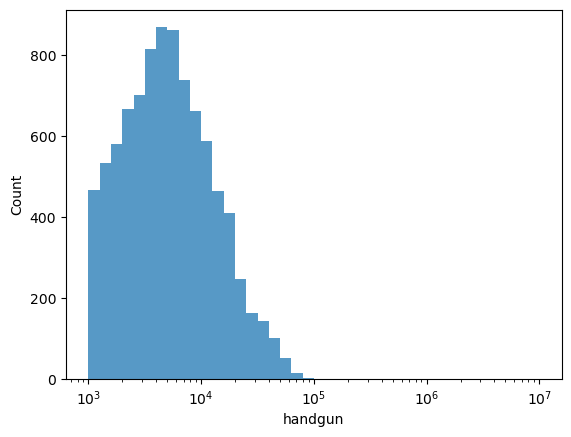

In [141]:
sns.histplot(data = df1 , x = 'handgun' , bins = bins)
plt.xscale('log')

In [143]:

## Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(3 , 7 + 0.1, 0.1)

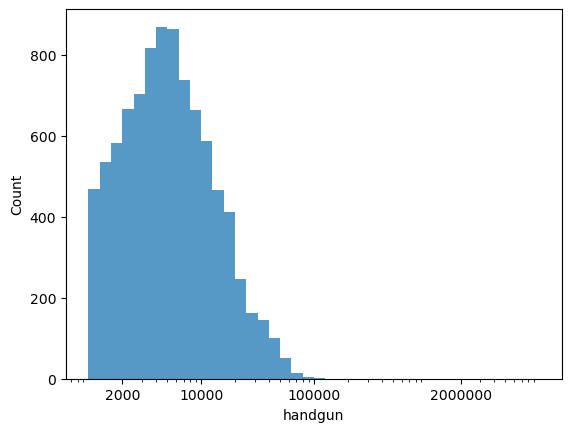

In [145]:
## Generate the x-ticks you want to apply
ticks = [2000,10000 ,  100000,  2000000]

## Convert ticks into string values, to be displaye dlong the x-axis
labels = [f'{v}' for v in ticks]

## Plot the histogram
sns.histplot(data=df1, x= 'handgun', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

## Apply x-ticks
plt.xticks(ticks, labels);


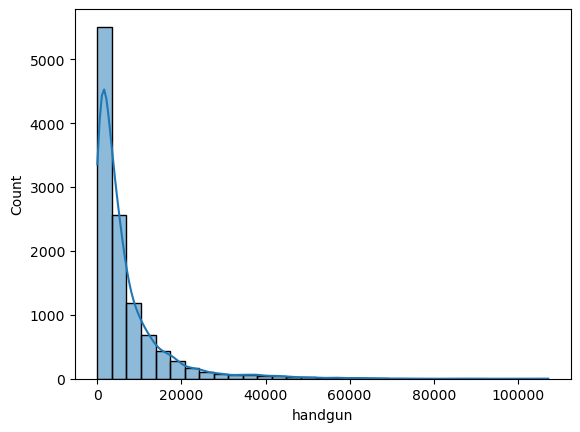

In [147]:
# The pokemon dataset is available to download at the bottom of this page.
sns.histplot(df1['handgun'], bins=31, kde=True);

<Axes: ylabel='Density'>

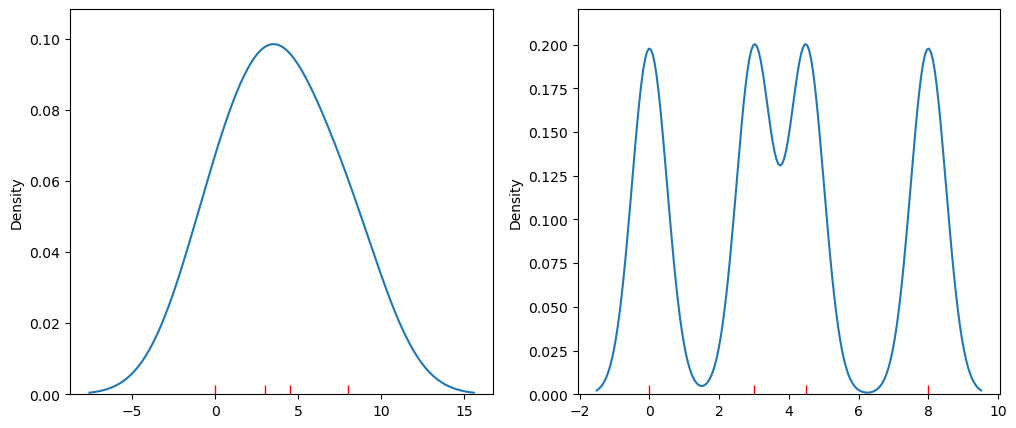

In [149]:
data = [0.0, 3.0, 4.5, 8.0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# left plot: kde with rugplot
sns.kdeplot(data, ax=ax1)
sns.rugplot(data, ax=ax1, color='r')

# right plot: kde with narrow bandwidth to show individual probability lumps
sns.kdeplot(data, ax=ax2, bw_adjust=0.2)
sns.rugplot(data, ax=ax2, color='r')


Text(0, 0.5, 'total_guns_sold')

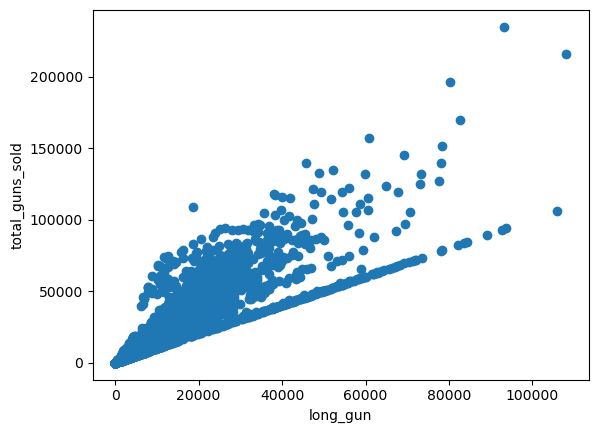

In [151]:
# Scatter plot
plt.scatter(data=df1, x='long_gun', y='total_guns_sold');
plt.xlabel('long_gun')
plt.ylabel('total_guns_sold')

Text(0, 0.5, 'total_guns_sold')

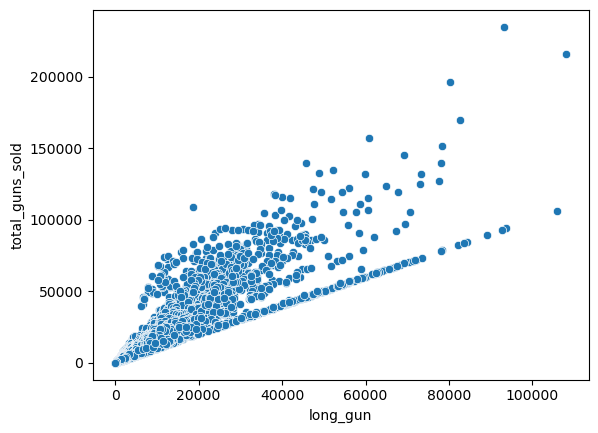

In [153]:
sns.scatterplot(data=df1, x='long_gun', y='total_guns_sold');
plt.xlabel('long_gun')
plt.ylabel('total_guns_sold')

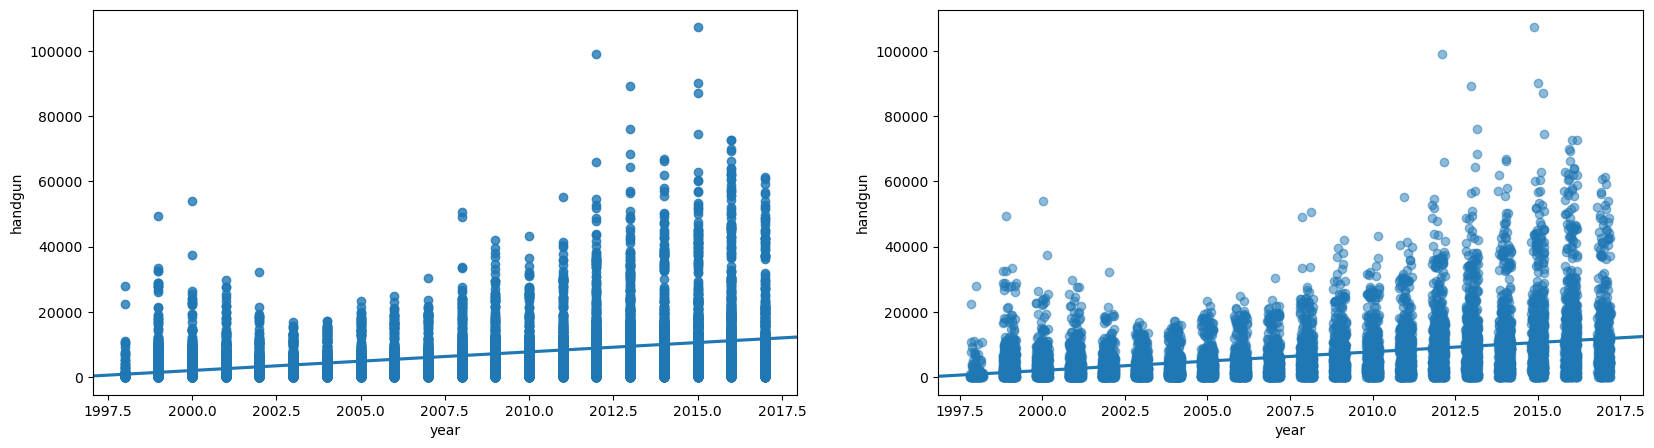

In [155]:
# Resize figure to accommodate two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# PLOT ON LEFT - SIMPLE SCATTER
sns.regplot(data=df1, x='year', y='handgun', truncate=False, ax=ax1);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
# In the ns.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sns.regplot(data=df1, x='year', y='handgun', truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/2} ,ax=ax2);

Text(0, 0.5, 'total_guns_sold')

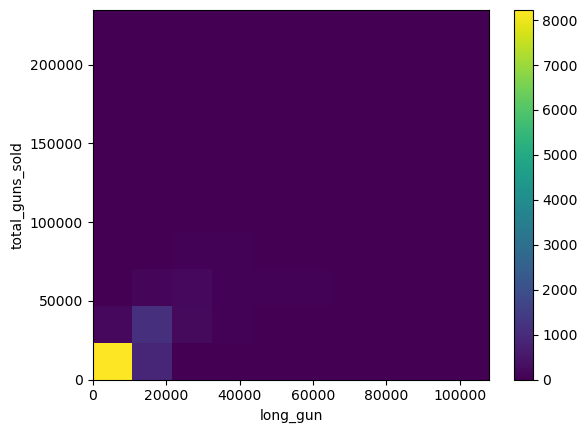

In [159]:
plt.hist2d(data=df1, x='long_gun', y='total_guns_sold');
plt.colorbar()
plt.xlabel('long_gun')
plt.ylabel('total_guns_sold')

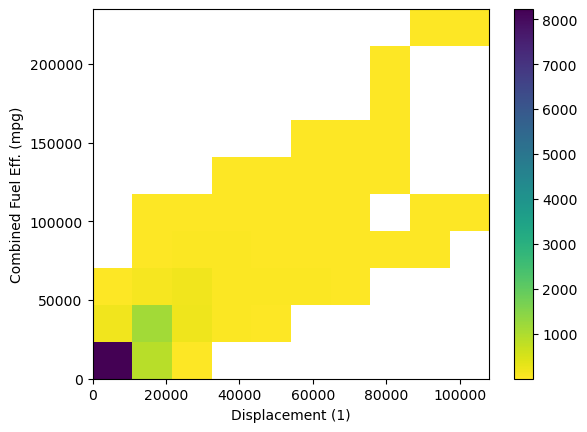

In [161]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data=df1, x = 'long_gun', y='total_guns_sold', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## How have gun registrations changed by type (handgun, long gun, other, multiple) from 2010 to 2016?

In [506]:
# Filter df1 for the year 2016
df1_2016 = df1[df1['year'] == 2016]
df1_2010 = df1[df1['year'] == 2010]
# Group the 2016 data and sum the columns
df1_g1_sum = df1_2016.groupby('year')[['handgun', 'long_gun', 'other', 'multiple']].sum().reset_index()

# Group the 2010 data and sum the columns
df2_g2_sum = df1_2010.groupby('year')[['handgun', 'long_gun', 'other', 'multiple']].sum().reset_index()

# Display the result
concatenated = pd.concat([df1_g1_sum, df2_g2_sum], axis=0)
print(concatenated.reset_index())

   index  year    handgun   long_gun     other  multiple
0      0  2016  8070529.0  5985314.0  585682.0    257368
1      0  2010  3670855.0  4840411.0   52717.0    180396


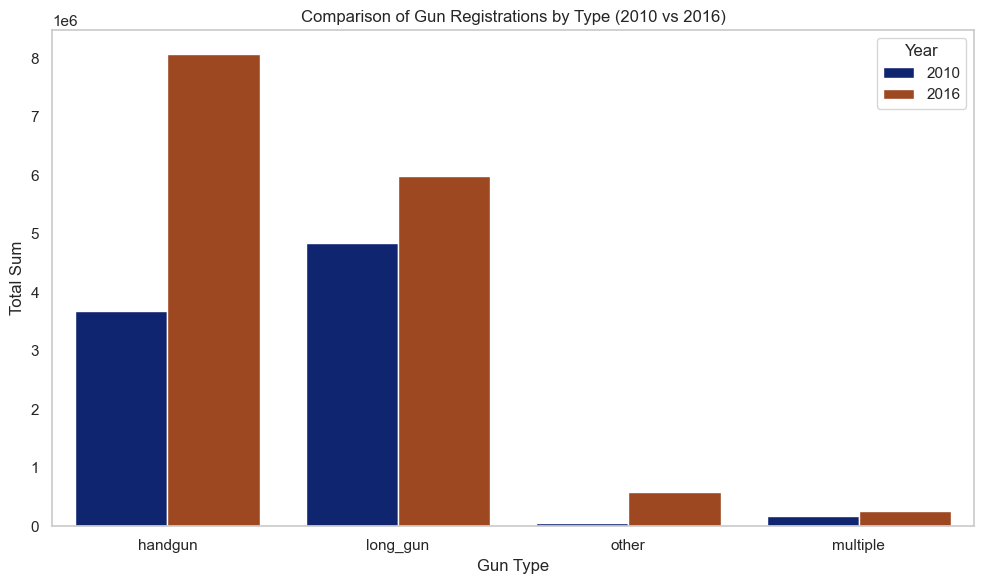

In [510]:
# Visualization
#sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Melt the data for visualization
melted_data = pd.melt(concatenated, id_vars=['year'], value_vars=['handgun', 'long_gun', 'other', 'multiple'],
                      var_name='Gun Type', value_name='Sum')

# Plot the data
sns.barplot(data=melted_data, x='Gun Type', y='Sum', hue='year', palette="dark")

# Customize the plot
plt.title('Comparison of Gun Registrations by Type (2010 vs 2016)')
plt.xlabel('Gun Type')
plt.ylabel('Total Sum')
plt.legend(title='Year')
plt.grid(False)
plt.tight_layout()
plt.show()

## What census data is most associated with high gun per capita?

In [318]:
# Filter df1 for the year 2016
df1_2016 = df1[df1['year'] == 2016]
df1_2010 = df1[df1['year'] == 2010]

# Group by state and sum the total guns sold
df1_2016 = df1_2016.groupby('state')['total_guns_sold'].sum().reset_index()

df1_2010 = df1_2010.groupby('state')['total_guns_sold'].sum().reset_index()

# Add the population data from df2 for each state
df1_2016 = pd.merge(df1_2016, df2[['state', 'Population_estimates_July1_2016']], on='state')
df1_2010 = pd.merge(df1_2010, df2[['state', 'Population_estimates_base_April1_2010']], on='state')

# Calculate guns sold per 100 people
df1_2016['guns_per_100_people'] = df1_2016['total_guns_sold'] / df1_2016['Population_estimates_July1_2016'] * 100
df1_2010['guns_per_100_people'] = df1_2010['total_guns_sold'] / df1_2010['Population_estimates_base_April1_2010'] * 100

# Reset index for a clean dataframe
df1_2016 = df1_2016.reset_index(drop=True)
df1_2010 = df1_2010.reset_index(drop=True)

# Display the result
df1_2010.head()


,state,total_guns_sold,Population_estimates_base_April1_2010,guns_per_100_people
0,Alabama,260718.0,4780131,5.454202
1,Alaska,61241.0,710249,8.622469
2,Arizona,164088.0,6392301,2.566963
3,Arkansas,125979.0,2916025,4.320230
4,California,520617.0,37254522,1.397460


In [446]:
df1_2016.head()

,state,total_guns_sold,Population_estimates_July1_2016,guns_per_100_people
0,Alabama,287735.0,4863300,5.916456
1,Alaska,79583.0,741894,10.727004
2,Arizona,296802.0,6931071,4.282195
3,Arkansas,169823.0,2988248,5.683029
4,California,1326612.0,39250017,3.379902


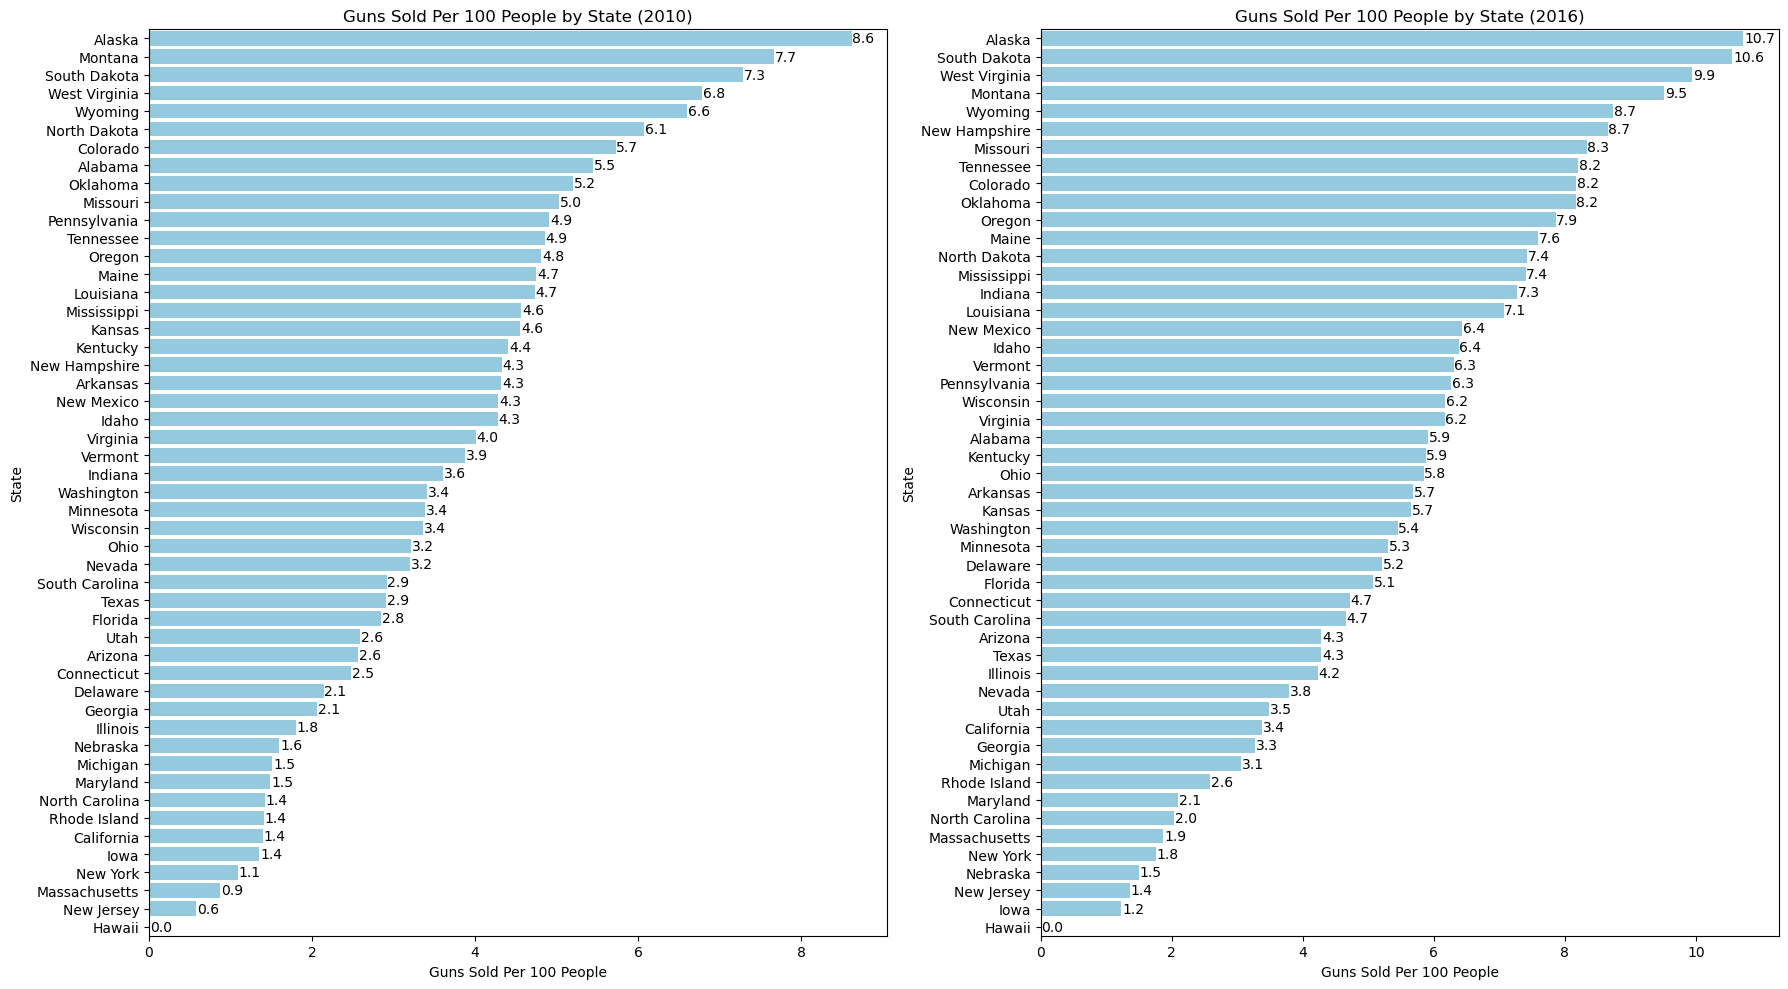

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a single figure with 1 row and 2 columns
plt.figure(figsize=(18, 10))

# Left plot: Guns sold per 100 people for 2010
plt.subplot(1, 2, 1)

# Sorting the 'guns_per_100_people' column in descending order
df1_2010_sorted = df1_2010.sort_values(by='guns_per_100_people', ascending=False)

# Create a horizontal bar chart with Seaborn
ax = sns.barplot(x='guns_per_100_people', y='state', data=df1_2010_sorted, color='skyblue')

# Add labels at the end of each bar (rounded to one decimal place)
for p in ax.patches:
    ax.text(p.get_width() + 0.01, p.get_y() + p.get_height() / 2,
            f'{p.get_width():.1f}',  # label text (guns sold per 100 people, rounded to one decimal place)
            va='center', ha='left', color='black')

# Add labels and title
plt.xlabel('Guns Sold Per 100 People')
plt.ylabel('State')
plt.title('Guns Sold Per 100 People by State (2010)')

# Right plot: Guns sold per 100 people for 2016
plt.subplot(1, 2, 2)

# Sorting the 'guns_per_100_people' column in descending order
df1_2016_sorted = df1_2016.sort_values(by='guns_per_100_people', ascending=False)

# Create a horizontal bar chart with Seaborn
ax = sns.barplot(x='guns_per_100_people', y='state', data=df1_2016_sorted, color='skyblue')

# Add labels at the end of each bar (rounded to one decimal place)
for p in ax.patches:
    ax.text(p.get_width() + 0.01, p.get_y() + p.get_height() / 2,
            f'{p.get_width():.1f}',  # label text (guns sold per 100 people, rounded to one decimal place)
            va='center', ha='left', color='black')

# Add labels and title
plt.xlabel('Guns Sold Per 100 People')
plt.ylabel('State')
plt.title('Guns Sold Per 100 People by State (2016)')

# Ensure everything fits nicely
plt.tight_layout()
plt.show()


In [330]:
df_merged = pd.merge(df1_2010_sorted, df1_2016_sorted, on='state')
df_merged

,state,total_guns_sold_x,Population_estimates_base_April1_2010,guns_per_100_people_x,total_guns_sold_y,Population_estimates_July1_2016,guns_per_100_people_y
0,Alaska,61241.0,710249,8.622469,79583.0,741894,10.727004
1,Montana,75857.0,989414,7.666861,99201.0,1042520,9.515501
2,South Dakota,59322.0,814195,7.285970,91360.0,865454,10.556309
3,West Virginia,125812.0,1853011,6.789598,182155.0,1831102,9.947835
4,Wyoming,37199.0,563767,6.598293,51136.0,585501,8.733717
5,North Dakota,40873.0,672591,6.076947,56244.0,757952,7.420523
6,Colorado,287891.0,5029324,5.724248,452711.0,5540545,8.170875
7,Alabama,260718.0,4780131,5.454202,287735.0,4863300,5.916456
8,Oklahoma,195318.0,3751615,5.206238,320454.0,3923561,8.167427
9,Missouri,301196.0,5988928,5.029214,507619.0,6093000,8.331183


## Which states have had the highest growth in gun registrations?

In [352]:
df_merged['growth'] = (df_merged["total_guns_sold_y"] - df_merged["total_guns_sold_x"] )/ df_merged["total_guns_sold_x"] *100
display = df_merged[['state','total_guns_sold_x','total_guns_sold_y', 'growth']]

/var/folders/zr/y9b0jtb16_q8qrlcsyx9s7740000gn/T/ipykernel_20490/3932464133.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



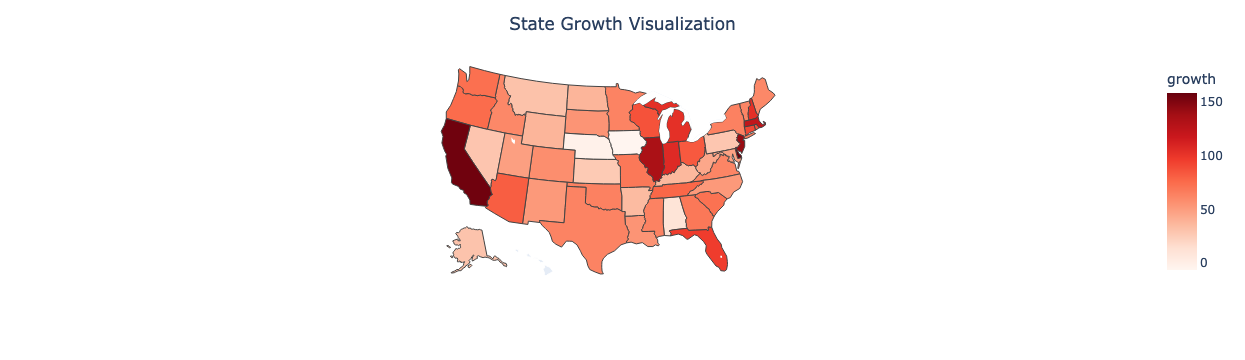

In [374]:
# Dictionary to map state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}


# Map full state names to abbreviations
display['state_abbr'] = display['state'].map(state_abbreviations)

# Create choropleth map for growth
fig = px.choropleth(
    display,
    locations='state_abbr',  # Use abbreviations for mapping
    locationmode="USA-states",
    color='growth',  # Growth metric as color
    scope="usa",
    color_continuous_scale='Reds'  # Correct parameter for color scale
)

# Add a title to the map
fig.update_layout(
    title="State Growth Visualization",
    title_x=0.5  # Center-align the title
)

fig.show()


## What percentage of the population owns a gun?

In [441]:
per_capita1 = df1['total_guns_sold'].sum() / df2['Population_estimates_July1_2016'].sum() *100
per_capita2 = df1['total_guns_sold'].sum() / df2['Population_estimates_base_April1_2010'].sum() *100
print(f"Gun Registration per Capita in 2010: {per_capita2:.1f}%")
print(f"Gun Registration per Capita in 2016: {per_capita1:.1f}%")

Gun Registration per Capita in 2010: 57.3%
Gun Registration per Capita in 2016: 54.8%


 ## What is the overall trend of gun purchases?

In [382]:
import plotly.express as px

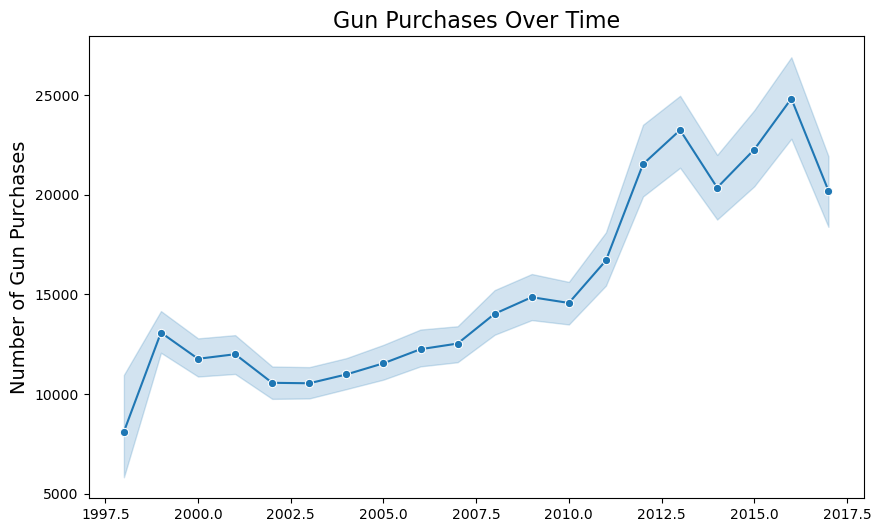

In [414]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x=df1["year"], y="total_guns_sold", marker="o")
plt.title("Gun Purchases Over Time", fontsize=16)
plt.xlabel("")
plt.ylabel("Number of Gun Purchases", fontsize=14)
plt.show()

<a id='conclusions'></a>
## Conclusions

In conclusion, the gun and census data share similar variables, such as states and dates. Comparing and contrasting both datasets by state and year gives insight into gun registration per capita in 2010 and 2016. In 2010, gun registration per capita was 57.3%, while in 2016, it was 54.8%. Additionally, states like Alaska, Montana, and others had the highest gun records per 100 people in 2010. In 2016, Alaska, South Dakota, and West Virginia were the states with the highest gun records per 100 people. The most commonly purchased types of firearms in the United States in 2016 were primarily handguns, followed by long guns and other types of firearms.

To keep the analysis focused on the 50 states of the U.S., I decided to exclude U.S. territories like Puerto Rico, Guam, and others from the census data. It would be more appropriate to include them in the census data to calculate and check the results of gun ownership per capita. Additionally, Hawaii might be an outlier among the states. Upon observing Hawaii from 2010 and 2016, the record is surprisingly lower than other American states. For instance, gun ownership per 100 is significantly lower. More in-depth analysis should be done to determine the appropriate range that Hawaii would fall into.

Another surprising finding comes from the map, which shows that California had a 154% increase in gun ownership from 2010 vs 2016, followed by Illinois. In my opinion, it would be reasonable to recheck the data from California. On the other hand, Illinois might be an outlier as well, since it has the strictest gun control laws in America but has registered high gun ownership. It is advised to further investigate the situation in Illinois.